Hi, I'm Sergey Russkikh. I will here to help you to improve the project. I will leave comments after cells I want to be discussed

You can find my comments in <font color='green'>green</font>, <font color='amber'>yellow</font> or <font color='red'>red</font> boxes like this:

<div class="alert alert-block alert-success">
<b>Success:</b> if everything is done succesfully
</div>

<div class="alert alert-block alert-warning">
<b>Remarks: </b> if I can give some recommendations
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with red comments.
</div>
Please, do not delete my comments

## Project-3 Statistical data analysis

#### Goal:
   To conduct a research on 500 Megaline clients with either Surf or Ultimate prepaid plan. Find and correct mistakes in the data, prepare it for the research. Find the number of calls clients of each plan make, the duration of calls, number of text messages and internet use. Group these numbers by months, show on graphs, analyze the data and find the profit. Test two hypotheses and make a conclusion. 

### Step 1. Open the data file and study the general information

In [24]:
import pandas as pd
import numpy as np
calls = pd.read_csv('/datasets/megaline_calls.csv')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [25]:
plans = pd.read_csv('/datasets/megaline_plans.csv')
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [26]:
internet = pd.read_csv('/datasets/megaline_internet.csv')
internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [27]:
text = pd.read_csv('/datasets/megaline_messages.csv')
text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [28]:
users = pd.read_csv('/datasets/megaline_users.csv')
tariff = users[['user_id', 'tariff']]
tariff

,user_id,tariff
0,1000,ultimate
1,1001,surf
2,1002,surf
3,1003,surf
4,1004,surf
...,...,...
495,1495,surf
496,1496,surf
497,1497,ultimate
498,1498,surf


In [29]:
city = users[['user_id', 'city']]
city

,user_id,city
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,"Tulsa, OK MSA"
4,1004,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...
495,1495,"New York-Newark-Jersey City, NY-NJ-PA MSA"
496,1496,"New Orleans-Metairie, LA MSA"
497,1497,"Los Angeles-Long Beach-Anaheim, CA MSA"
498,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA"


In [30]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


### Step 2. Prepare the data

In [31]:
#Dates in all the data are given as object type, for further research they need to be changed to datetime type
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
#Addind a column with months
calls['month'] = calls['call_date'].dt.month

text['message_date'] = pd.to_datetime(text['message_date'], format='%Y-%m-%d')
text['month'] = text['message_date'].dt.month

internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['month'] = internet['session_date'].dt.month
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
internet

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,90.0,12
1,1000_204,1000,2018-12-31,0.0,12
2,1000_379,1000,2018-12-28,661.0,12
3,1000_413,1000,2018-12-26,271.0,12
4,1000_442,1000,2018-12-27,881.0,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,219.0,10
104821,1499_216,1499,2018-12-30,305.0,12
104822,1499_217,1499,2018-09-22,293.0,9
104823,1499_218,1499,2018-12-07,0.0,12


In [32]:
#Counting the number of calls made by each user and the calls' duration
calls_count = calls.pivot_table(index=['user_id', 'month'], values=['duration'], aggfunc=['count', 'sum'])
calls_count

count      sum
              duration duration
user_id month                  
1000    12          16   116.83
1001    8           27   171.14
        9           49   297.69
        10          65   374.11
        11          64   404.59
...                ...      ...
1498    12          39   324.77
1499    9           41   330.37
        10          53   363.28
        11          45   288.56
        12          65   468.10

[2258 rows x 2 columns]

In [33]:
#Counting the number of messages
text_count = text.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
text_count

id
user_id month    
1000    12     11
1001    8      30
        9      44
        10     53
        11     36
...            ..
1496    9      21
        10     18
        11     13
        12     11
1497    12     50

[1806 rows x 1 columns]

In [34]:
#MB of internet used by each client
mb_used = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
mb_used

mb_used
user_id month         
1000    12      1903.0
1001    8       6929.0
        9      13333.0
        10     22356.0
        11     18524.0
...                ...
1498    12     23160.0
1499    9      13004.0
        10     19515.0
        11     16834.0
        12     22091.0

[2277 rows x 1 columns]

<div class="alert alert-block alert-warning">
What if we had calls in 2019? You would have duplicates by month
</div>


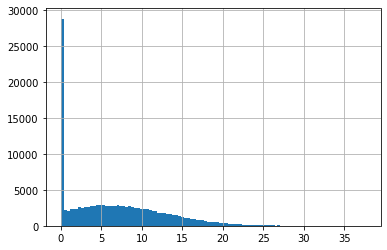

In [35]:
calls.duration.hist(bins='auto')

<div class="alert alert-block alert-warning">
What will you do with calls = 0 duration?
</div>


#### On the graph we can see 0 minute calls. These calls will be ignored when the final profit is calculated. Calls' duration and Internet use numbers will be rounded up according to Megaline rules. You can see the code in Step 3

<div class="alert alert-block alert-warning">
Maybe it's just calls that no one answered. There probably wasn't a connection, so it's best to remove such calls from the sample or ignore them
</div>


### Step 3. Analyze the data

In [36]:
#Combining all of the previously found pivot tables
total = calls_count.merge(text_count, on=['user_id', 'month'], how='outer')
total = total.merge(mb_used, on=['user_id', 'month'], how='outer').reset_index(drop=False)
total

,user_id,month,"(count, duration)","(sum, duration)",id,mb_used
0,1000,12,16.0,116.83,11.0,1903.0
1,1001,8,27.0,171.14,30.0,6929.0
2,1001,9,49.0,297.69,44.0,13333.0
3,1001,10,65.0,374.11,53.0,22356.0
4,1001,11,64.0,404.59,36.0,18524.0
...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13052.0
2289,1361,5,NaN,NaN,2.0,1523.0
2290,1482,10,NaN,NaN,2.0,NaN
2291,1108,12,NaN,NaN,NaN,235.0


In [37]:
# total.shape

In [38]:
#A table with tariffes each of the clients uses was generated in advance in Step 1
total = total.merge(tariff, how='left', on='user_id')
total.columns = ['user_id', 'month', 'calls_number', 'calls_duration', 'text_number', 'gb_used', 'tariff']
total[['calls_number', 'calls_duration', 'text_number', 'gb_used']] = total[['calls_number', 'calls_duration','text_number', 'gb_used']].fillna(0)
total

,user_id,month,calls_number,calls_duration,text_number,gb_used,tariff
0,1000,12,16.0,116.83,11.0,1903.0,ultimate
1,1001,8,27.0,171.14,30.0,6929.0,surf
2,1001,9,49.0,297.69,44.0,13333.0,surf
3,1001,10,65.0,374.11,53.0,22356.0,surf
4,1001,11,64.0,404.59,36.0,18524.0,surf
...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.00,61.0,13052.0,surf
2289,1361,5,0.0,0.00,2.0,1523.0,surf
2290,1482,10,0.0,0.00,2.0,0.0,ultimate
2291,1108,12,0.0,0.00,0.0,235.0,ultimate


In [39]:
# total.shape

In [40]:
# test = calls_count.join(text_count, on=['user_id', 'month'])
# test.shape

In [41]:
# test = calls_count.merge(text_count, on=['user_id', 'month'], how = 'outer')
# test.shape

<div class="alert alert-block alert-warning">
When you did this calls_count.join(text_count, on=['user_id', 'month'])
    
It means that you get data only if user have calls ant sms in specific period 

You have lost 2291 - 2258 = 33 clients only in this operation, please look at example above
    
    
Here need to use merge with parameter how='outer'


</div>


#### Rounding up the duration of the calls and internet use numbers according to Megaline rules

In [42]:
#Megaline rounds up the calls' duration and gb of internet
total['gb_used'] = (total['gb_used'] / 1024).apply(np.ceil) #mb are changed to gb
total['calls_duration'] = total['calls_duration'].apply(np.ceil) # calls are rounded up
total

,user_id,month,calls_number,calls_duration,text_number,gb_used,tariff
0,1000,12,16.0,117.0,11.0,2.0,ultimate
1,1001,8,27.0,172.0,30.0,7.0,surf
2,1001,9,49.0,298.0,44.0,14.0,surf
3,1001,10,65.0,375.0,53.0,22.0,surf
4,1001,11,64.0,405.0,36.0,19.0,surf
...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13.0,surf
2289,1361,5,0.0,0.0,2.0,2.0,surf
2290,1482,10,0.0,0.0,2.0,0.0,ultimate
2291,1108,12,0.0,0.0,0.0,1.0,ultimate


<div class="alert alert-block alert-warning">
You're making an incorrect rounding, your code:


total['gb_used'] = total['gb_used'] / 1024 + 1
    
Lets try calculate for user with id= 1000 in 12 month (MB Used =1901.47)

1901.47/1024 + 1 = 1.85 + 1 = 2.85

and than you convert data to int. int(2.85) = 2
    
<b>It's dangerous way to round value</b>, better way is use np.ceil like that (for example without + 1):

internet['mb_used'] = internet['mb_used'].apply(np.ceil)
 
</div>


<div class="alert alert-block alert-warning">

Please rewrite the code:

* Megaline always rounds up the minute and megabyte values. If the call lasted just one second, it will be counted as one minute, and if one megabyte of data was used, it will be counted as one gigabyte

* 1 GB = 1024 MB
 
* If you use INNER when merge different dataframes, you may lose some of the data. For example, if the client did not make calls, but still used the Internet , this client will not be included in your dataframe 
<img src="https://i.stack.imgur.com/ZrLKk.png">
</div>


#### Calculating the profit of each tariff

In [43]:
#Defining functions which calculates the profit from each tariff
def profit_counter(row): #for Surf users
    profit = 20
    added_messages = 0
    added_minutes = 0
    added_mb = 0
    if row['tariff'] == 'surf':
        if row['text_number'] > 50:
            added_messages = (row['text_number'] - 50) * 0.03
            profit += added_messages
        if row['calls_duration'] > 500:
            added_minutes = (row['calls_duration'] - 500) * 0.03
            profit += added_minutes
        if row['gb_used'] > 15:
            added_mb = (row['gb_used'] - 15) * 10
            profit += added_mb
        else:
            profit
        return profit
 
total['profit_surf'] = total.apply(profit_counter, axis=1)

In [44]:
total.head()

,user_id,month,calls_number,calls_duration,text_number,gb_used,tariff,profit_surf
0,1000,12,16.0,117.0,11.0,2.0,ultimate,NaN
1,1001,8,27.0,172.0,30.0,7.0,surf,20.00
2,1001,9,49.0,298.0,44.0,14.0,surf,20.00
3,1001,10,65.0,375.0,53.0,22.0,surf,90.09
4,1001,11,64.0,405.0,36.0,19.0,surf,60.00


<div class="alert alert-block alert-warning">

You wrote a cool function! :) 

But it needs a little tweaking.Your calculation is wrong.
Lets look at user_id = 1001 in 11 month
* calls_number = 65
* calls_duration = 375
* text_number = 53
* gb_used = 22
    
<b>Your profit_surf = 20.09</b>    
    
   
This is because the <b>if row['text_number'] > 50: </b> condition is met: and the function calculates <b>profit += added_messages</b> and stops working and returns the result
    
Real profit for this case is 20 + 0.03*(53-50 text) + 10*(22-15 Gb) = <b>90.09</b> 
    

### Just replace elif with if, like that (example below)
    
One more time and you'll have it!

</div>

upd - ok

In [45]:
    
# if row['text_number'] > 50:
#             added_messages = (row['text_number'] - 50) * 0.03
#             profit += added_messages
# if row['calls_duration'] > 500:
#             added_minutes = (row['calls_duration'] - 500) * 0.03
#             profit += added_minutes

In [46]:
def profit_counter2(row): #for Ultimate users
    profit = 70
    added_messages = 0
    added_minutes = 0
    added_mb = 0
    if row['tariff'] == 'ultimate':
        if row['text_number'] > 1000:
            added_messages = (row['text_number'] - 3000) * 0.01
            profit += added_messages
        if row['calls_duration'] > 3000:
            added_minutes = (row['calls_duration'] - 3000) * 0.01
            profit += added_minutes
        if row['gb_used'] > 30:
            added_mb = (row['gb_used'] - 30) * 7
            profit += added_mb
        else:
            profit
        return profit
 
total['profit_ult'] = total.apply(profit_counter2, axis=1)

<div class="alert alert-block alert-warning">
You need write a function that help you calculate the profit
    
When you do this ['calls_duration'] - 3000 it means if i have only 60 minutes of calls you calculation would be is 60-3000 = -2400  

And this value you add to total profit and this is a reason why you have negative profit
   
The user purchases a package of services = 3000 minutes. If he spoke only 60 minutes, it means that he no longer pays extra over the limit, just these minutes are lost.
</div>

In [47]:
total['profit'] = total['profit_ult'].fillna(total.profit_surf)
total = total[['user_id', 'month', 'calls_number', 'calls_duration', 'text_number',
       'gb_used', 'tariff', 'profit']]
total

,user_id,month,calls_number,calls_duration,text_number,gb_used,tariff,profit
0,1000,12,16.0,117.0,11.0,2.0,ultimate,70.00
1,1001,8,27.0,172.0,30.0,7.0,surf,20.00
2,1001,9,49.0,298.0,44.0,14.0,surf,20.00
3,1001,10,65.0,375.0,53.0,22.0,surf,90.09
4,1001,11,64.0,405.0,36.0,19.0,surf,60.00
...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13.0,surf,20.33
2289,1361,5,0.0,0.0,2.0,2.0,surf,20.00
2290,1482,10,0.0,0.0,2.0,0.0,ultimate,70.00
2291,1108,12,0.0,0.0,0.0,1.0,ultimate,70.00


<div class="alert alert-block alert-warning">
You have negative profit values. Do we need to return the money to the client?</div>


<div class="alert alert-block alert-warning">

No, that's not true. The user buys a package of services, and the company will get the money in any case
    
* Surf = Monthly charge: 20
    
* Ultimate = Monthly charge: 70
</div>


#### Finding the mean, variance and std of clients with "Ultimate"

In [48]:
ultimate = (total
    .query('tariff=="ultimate"')
    .pivot_table(index='month', values=['calls_number', 'calls_duration', 'text_number', 'gb_used'], aggfunc='sum')
    .reset_index(drop=False)
)

In [49]:
ultimate[['calls_number', 'calls_duration', 'gb_used', 'text_number']].describe()

,calls_number,calls_duration,gb_used,text_number
count,12.000000,12.000000,12.000000,12.000000
mean,3637.583333,24402.500000,1040.083333,2253.083333
std,3215.295617,21587.264594,889.453812,2167.833248
min,112.000000,735.000000,29.000000,62.000000
25%,886.500000,5852.750000,312.500000,408.000000
50%,2957.500000,20159.500000,850.000000,1658.000000
75%,5627.750000,37969.750000,1570.750000,3489.500000
max,9800.000000,65466.000000,2783.000000,6796.000000


In [50]:
ultimate[['calls_number', 'calls_duration', 'gb_used', 'text_number']].var()

calls_number      1.033813e+07
calls_duration    4.660100e+08
gb_used           7.911281e+05
text_number       4.699501e+06
dtype: float64

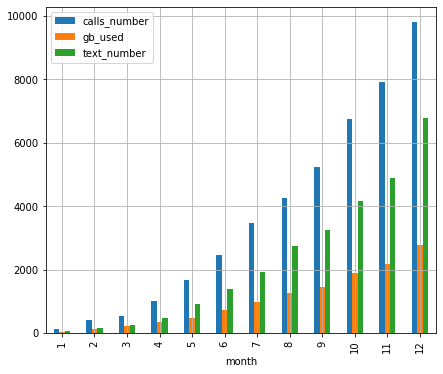

In [51]:
ultimate.plot(x='month', y=['calls_number', 'gb_used', 'text_number'], kind='bar', grid=True, figsize=(7,6))

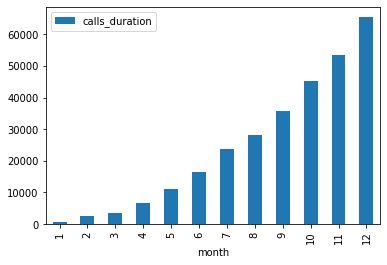

In [52]:
ultimate.plot(x='month', y='calls_duration', kind='bar')

#### As seen from the graphs the clients have been more and more active since January and by the end of the year have reached the peak of activity. 

#### Finding the mean, variance and std of clients with "Surf"

In [53]:
surf = (total
    .query('tariff=="surf"')
    .pivot_table(index='month', values=['calls_number', 'calls_duration', 'text_number', 'gb_used'], aggfunc='sum')
    .reset_index(drop=False)
)

In [54]:
surf[['calls_number', 'calls_duration', 'gb_used', 'text_number']].describe()

,calls_number,calls_duration,gb_used,text_number
count,12.000000,12.000000,12.000000,12.000000
mean,7840.333333,53121.583333,2187.083333,4084.500000
std,6818.686628,46336.499125,1933.379399,4013.379884
min,60.000000,386.000000,10.000000,21.000000
25%,2100.000000,14275.250000,536.250000,740.250000
50%,6705.500000,45485.500000,1774.000000,2862.500000
75%,12030.500000,81024.000000,3461.750000,6481.000000
max,20814.000000,142459.000000,5803.000000,12275.000000


In [55]:
surf[['calls_number', 'calls_duration', 'gb_used', 'text_number']].var()

calls_number      4.649449e+07
calls_duration    2.147071e+09
gb_used           3.737956e+06
text_number       1.610722e+07
dtype: float64

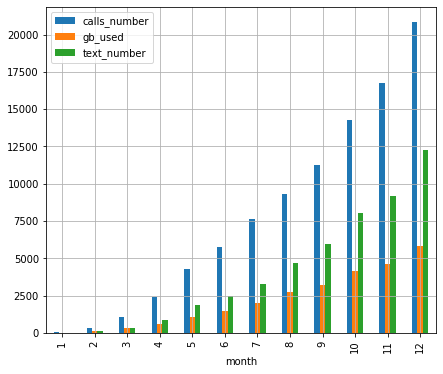

In [56]:
surf.plot(x='month', y=['calls_number', 'gb_used', 'text_number'], kind='bar', grid=True, figsize=(7,6))

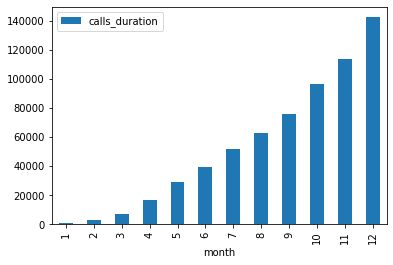

In [57]:
surf.plot(x='month', y='calls_duration', kind='bar')

### Step 4. Test the hypotheses

#### Test 1
H0 - The average profit from users of Ultimate and Surf calling plans does not differ. H1 - The average profit from users of Ultimate and Surf calling plans differs

In [58]:
# uniq = total.user_id.unique().tolist()
# users.query('user_id not in @uniq')

In [59]:
from scipy import stats as st

profit_ult = total.query('tariff=="ultimate"')['profit']
profit_surf = total.query('tariff=="surf"')['profit']

alpha=0.05

results = st.ttest_ind(profit_ult, profit_surf,equal_var=False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  5.978598762218365e-16
We reject the null hypothesis



<div class="alert alert-block alert-warning">
The reported p-value is essentially zero, meaning that we reject the hypothesis at any reasonable significance level and conclude that the means of two distributions are different
</div>


count    720.000000
mean      72.333333
std       11.498322
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: profit, dtype: float64

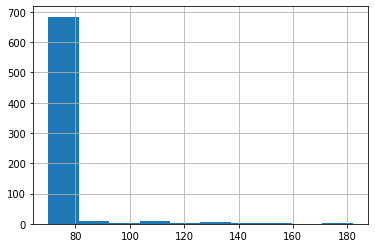

In [60]:
total.query('tariff=="ultimate"')['profit'].hist(bins=10)
total.query('tariff=="ultimate"')['profit'].describe()

count    1573.000000
mean       60.420935
std        55.325932
min        20.000000
25%        20.000000
50%        40.360000
75%        80.000000
max       588.660000
Name: profit, dtype: float64

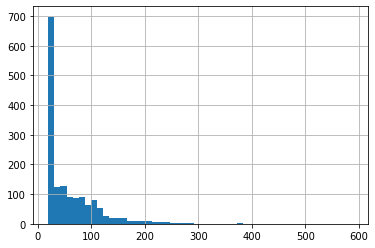

In [61]:
total.query('tariff=="surf"')['profit'].hist(bins=50)
total.query('tariff=="surf"')['profit'].describe()

These histograms show the distrbution of profit gained from the calling plans. As seen from the first plot most of the clients with Ultimate plan do not use the free package limit to the fullest, which leads to no extra profit for the company. The total number of Surf users is 1573. As seen from the second plot roughly 1200 users do not exceed the plan limits. However the maximum profit is much higher than that of Ultimate tariff, 380 and 182$, respectively. It may mean that although the majority of clients prefer the cheaper plan, sometimes they tend to spend more money exceeding the plan limit afterwards. Here the hypothesis that the average profit from users of Ultimate and Surf calling plans differs was tested. According to the results we can accept this hypothesis. 

In [62]:
# users.tariff.value_counts()

In [63]:
total.query('tariff=="surf"')['profit']

1        20.00
2        20.00
3        90.09
4        60.00
5        60.00
         ...  
2282    180.18
2286     20.78
2287     40.66
2288     20.33
2289     20.00
Name: profit, Length: 1573, dtype: float64

In [64]:
total[total['user_id']==1003].head()

,user_id,month,calls_number,calls_duration,text_number,gb_used,tariff,profit
9,1003,12,149.0,1041.0,50.0,27.0,surf,156.23


<div class="alert alert-block alert-warning">
You're getting the numbers wrong. Please be careful with this. You have only 500 users
</div>


#### Test 2
H0 - The average profit from users in NY-NJ area is not different from that of the users from other regions. H1 - The average profit from users in NY-NJ area is different from that of the users from other regions.

In [65]:
#Adding information about cities
total_1 = total.merge(city, how='left', on='user_id')
total_1

,user_id,month,calls_number,calls_duration,text_number,gb_used,tariff,profit,city
0,1000,12,16.0,117.0,11.0,2.0,ultimate,70.00,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,27.0,172.0,30.0,7.0,surf,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,49.0,298.0,44.0,14.0,surf,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,65.0,375.0,53.0,22.0,surf,90.09,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,64.0,405.0,36.0,19.0,surf,60.00,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13.0,surf,20.33,"Boston-Cambridge-Newton, MA-NH MSA"
2289,1361,5,0.0,0.0,2.0,2.0,surf,20.00,"Birmingham-Hoover, AL MSA"
2290,1482,10,0.0,0.0,2.0,0.0,ultimate,70.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2291,1108,12,0.0,0.0,0.0,1.0,ultimate,70.00,"Salt Lake City, UT MSA"


In [66]:
profit_NY_NJ = total_1.query('city=="New York-Newark-Jersey City, NY-NJ-PA MSA"')['profit']
profit_other = total_1.query('city!="New York-Newark-Jersey City, NY-NJ-PA MSA"')['profit']

results = st.ttest_ind(profit_NY_NJ, profit_other,equal_var=False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  0.031761559022760254
We reject the null hypothesis


In [67]:
# print('sample_sizes:\n',len(profit_NY_NJ),len(profit_other))

sample_sizes:
 377 1916


### Conclusion

The analysis has shown that the users of Surf plan make more calls, text messages and use more mobile internet than Ultimate plan users on average. The reason is simple, there are twice more Surf plan users. The figures (in step 3) that show the monthly distibution of phone calls' duration, internet use etc have the same pattern for both mobile plans. The distributions in step 3 clearly show that the tariffs have been gaining more and more popularity, reaching the peak activity in December. Two hypotheses were tested, the first one with H0 - The average profit from users of Ultimate and Surf calling plans does not differ and H1 - The average profit from users of Ultimate and Surf calling plans differs. The test showed that the alternative hypothesis can be accepted. The average profit for the plans is different and Surf plan probably generates more revenue. The second test, H0 - The average profit from users in NY-NJ area is not different from that of the users from other regions. H1 - The average profit from users in NY-NJ area is different from that of the users from other regions. The second test also showed that the alternative hypothesis can be accepted. The NY_NJ area probably has more potential clients and as a result the profit generated in this area is larger. 